<a href="https://colab.research.google.com/github/chitwan6804/Data_mining/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/heeraldedhia/groceries-dataset/versions/1


In [ ]:
import os

file_path=os.path.join(path,'Groceries_dataset.csv')

In [ ]:
import pandas as pd

basket=pd.read_csv(file_path)

In [ ]:
basket.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Ensure column names are correct
print(basket.columns)  # You should see Member_number, Date, itemDescription

# Group items into transactions
basket_grouped = basket.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# Extract the list of transactions
transactions = basket_grouped['itemDescription'].tolist()

# Apply TransactionEncoder
encoder = TransactionEncoder()
encoded_array = encoder.fit_transform(transactions)
transactions_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

# Display encoded transaction data
display(transactions_df.head())


Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_items=apriori(transactions_df,min_support=6/len(basket),use_colnames=True,max_len=2)
rules=association_rules(frequent_items,metric='lift',min_threshold=1.5)
display(rules.head())
print("Rules identifies: ",len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whipped/sour cream),(Instant food products),0.043708,0.004010,0.000267,0.006116,1.525280,1.0,0.000092,1.002119,0.360123,0.005634,0.002115,0.036391
1,(Instant food products),(whipped/sour cream),0.004010,0.043708,0.000267,0.066667,1.525280,1.0,0.000092,1.024599,0.345769,0.005634,0.024008,0.036391
2,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,1.0,0.000226,1.013289,0.381761,0.015679,0.013115,0.031173
3,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,1.0,0.000226,1.010854,0.383247,0.015679,0.010737,0.031173
4,(candles),(UHT-milk),0.004411,0.021386,0.000200,0.045455,2.125426,1.0,0.000106,1.025215,0.531852,0.007833,0.024594,0.027415


Rules identifies:  768


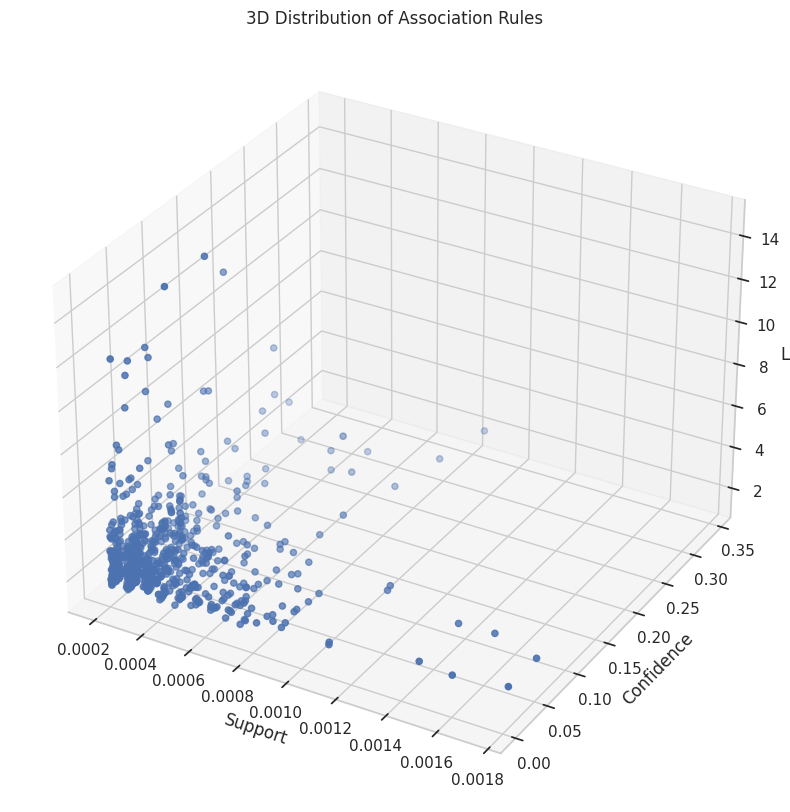

In [ ]:
sns.set(style="whitegrid")
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')

x=rules['support']
y=rules['confidence']
z=rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x,y,z)
ax.set_title("3D Distribution of Association Rules")
plt.show()

<>:17: DeprecationWarning: invalid escape sequence '\d'
<>:17: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-29-10c8541c032a>:17: DeprecationWarning: invalid escape sequence '\d'
  if re.compile("[R]\d+$").fullmatch(node)!=None:


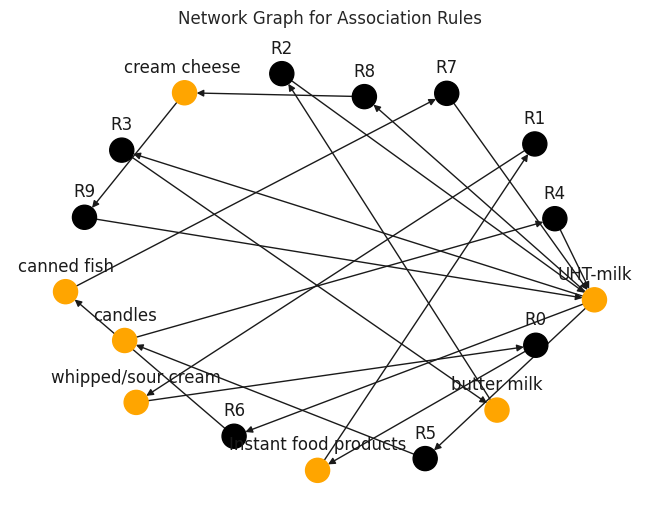

In [ ]:
def draw_network(rules,rules_to_show):
  network=nx.DiGraph()

  for i in range(rules_to_show):
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]["antecedents"]:
      network.add_nodes_from([antecedents])
      network.add_edge(antecedents,"R"+str(i),weight=2)

    for consequents in rules.iloc[i]["consequents"]:
      network.add_nodes_from([consequents])
      network.add_edge("R"+str(i),consequents,weight=2)

  color_map=[]

  for node in network:
    if re.compile("[R]\d+$").fullmatch(node)!=None:
      color_map.append('black')
    else:
      color_map.append('orange')

  pos=nx.spring_layout(network,k=16,scale=1)
  nx.draw(network,pos,node_color=color_map,font_size=8)
  # Shift the text position upwards
  for p in pos:
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

In [ ]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,1.0,0.000468,1.279957,0.539750,0.005444,0.218724,0.173803
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,1.0,0.000369,1.190523,0.461695,0.005017,0.160033,0.148881
2,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,1.0,0.000179,1.178908,0.447899,0.002523,0.151757,0.144127
3,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,1.0,0.000179,1.178908,0.447899,0.002523,0.151757,0.144127
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,1.0,0.000229,1.162868,0.428360,0.003356,0.140057,0.139624


In [ ]:
butter_milk_rules = rules[rules['consequents'].astype(str).str.contains('butter milk')]
butter_milk_rules = butter_milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(butter_milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(zwieback),(butter milk),0.004010,0.017577,0.000267,0.066667,3.792902,1.0,0.000197,1.052596,0.739314,0.012539,0.049968,0.040938
1,(pot plants),(butter milk),0.007819,0.017577,0.000334,0.042735,2.431348,1.0,0.000197,1.026281,0.593345,0.013333,0.025608,0.030873
2,(packaged fruit/vegetables),(butter milk),0.008488,0.017577,0.000334,0.039370,2.239903,1.0,0.000185,1.022687,0.558291,0.012987,0.022183,0.029191
3,(long life bakery product),(butter milk),0.017911,0.017577,0.000668,0.037313,2.122893,1.0,0.000354,1.020502,0.538591,0.019194,0.020090,0.037668
4,(canned vegetables),(butter milk),0.005480,0.017577,0.000200,0.036585,2.081471,1.0,0.000104,1.019731,0.522434,0.008772,0.019349,0.023996
